# Overlay analysis

In this tutorial, the aim is to make an overlay analysis where we create a new layer based on geometries from a dataset that `intersect` with geometries of another layer. As our test case, we will select Polygon grid cells from `TravelTimes_to_5975375_RailwayStation_Helsinki.shp` that intersects with municipality borders of Helsinki found in `Helsinki_borders.shp`.

UPDATE IMAGE!

![_**Figure 6.31**. Typical overlay operations. Source: [QGIS documentation](https://docs.qgis.org/2.8/en/docs/gentle_gis_introduction/vector_spatial_analysis_buffers.html#more-spatial-analysis-tools)._](../img/overlay_operations.png)

_**Figure 6.31**. Typical overlay operations. Source: [QGIS documentation](https://docs.qgis.org/2.8/en/docs/gentle_gis_introduction/vector_spatial_analysis_buffers.html#more-spatial-analysis-tools)._

In [1]:
import os

os.environ["USE_PYGEOS"] = "0"
import geopandas as gpd
import matplotlib.pyplot as plt

%matplotlib inline

# File paths
border_fp = "data/Helsinki/Helsinki_borders.shp"
grid_fp = "data/Helsinki/TravelTimes_to_5975375_RailwayStation.shp"

# Read files
grid = gpd.read_file(grid_fp)
hel = gpd.read_file(border_fp)

Let's do a quick overlay visualization of the two layers:

<AxesSubplot: >

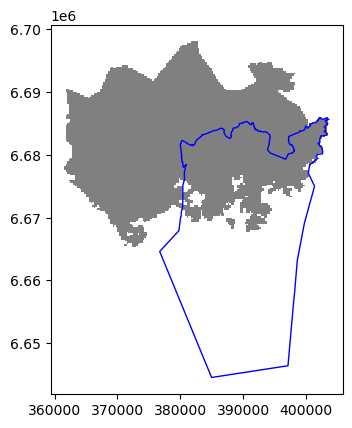

In [2]:
# Plot the layers
ax = grid.plot(facecolor="gray")
hel.plot(ax=ax, facecolor="None", edgecolor="blue")

_**Figure 6.32**. ADD PROPER FIGURE CAPTION!._

Here the grey area is the Travel Time Matrix - a data set that contains  13231 grid squares (13231 rows of data) that covers the Helsinki region, and the blue area represents the municipality of Helsinki. Our goal is to conduct an overlay analysis and select the geometries from the grid polygon layer that intersect with the Helsinki municipality polygon.

When conducting overlay analysis, it is important to first check that the CRS of the layers match. The overlay visualization indicates that everything should be ok (the layers are plotted nicely on top of each other). However, let's still check if the crs match using Python:

In [3]:
# Check the crs of the municipality polygon
print(hel.crs)

EPSG:3067


In [4]:
# Ensure that the CRS matches, if not raise an AssertionError
assert hel.crs == grid.crs, "CRS differs between layers!"

Indeed, they do. We are now ready to conduct an overlay analysis between these layers. 

We will create a new layer based on grid polygons that `intersect` with our Helsinki layer. We can use a function called `overlay()` to conduct the overlay analysis that takes as an input 1) first GeoDataFrame, 2) second GeoDataFrame, and 3) parameter `how` that can be used to control how the overlay analysis is conducted (possible values are `'intersection'`, `'union'`, `'symmetric_difference'`, `'difference'`, and `'identity'`):

In [5]:
intersection = gpd.overlay(grid, hel, how="intersection")

Let's plot our data and see what we have:

<AxesSubplot: >

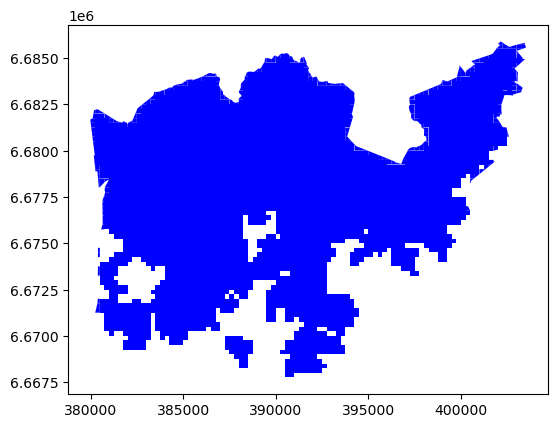

In [6]:
intersection.plot(color="b")

_**Figure 6.33**. ADD PROPER FIGURE CAPTION!._

As a result, we now have only those grid cells that intersect with the Helsinki borders. If you look closely, you can also observe that **the grid cells are clipped based on the boundary.**

- What about the data attributes? Let's see what we have:


In [7]:
intersection.head()

,car_m_d,car_m_t,car_r_d,car_r_t,from_id,pt_m_d,pt_m_t,pt_m_tt,pt_r_d,pt_r_t,pt_r_tt,to_id,walk_d,walk_t,GML_ID,NAMEFIN,NAMESWE,NATCODE,geometry
0,29476,41,29483,46,5876274,29990,76,95,24984,77,99,5975375,25532,365,27517366,Helsinki,Helsingfors,091,"POLYGON ((402024.224 6685750.000, 402003.328 6..."
1,29456,41,29462,46,5876275,29866,74,95,24860,75,93,5975375,25408,363,27517366,Helsinki,Helsingfors,091,"POLYGON ((402250.000 6685750.000, 402250.000 6..."
2,36772,50,36778,56,5876278,33541,116,137,44265,130,146,5975375,31110,444,27517366,Helsinki,Helsingfors,091,"POLYGON ((403148.515 6685750.000, 403243.781 6..."
3,36898,49,36904,56,5876279,33720,119,141,44444,132,155,5975375,31289,447,27517366,Helsinki,Helsingfors,091,"POLYGON ((403250.000 6685750.000, 403250.000 6..."
4,29411,40,29418,44,5878128,29944,75,95,24938,76,99,5975375,25486,364,27517366,Helsinki,Helsingfors,091,"POLYGON ((401900.425 6685500.000, 402000.000 6..."


As we can see, due to the overlay analysis, the dataset contains the attributes from both input layers.

Let's save our result grid as a GeoJSON file that is commonly used file format nowadays for storing spatial data.

In [8]:
# Output filepath
outfp = "data/Helsinki/TravelTimes_to_5975375_RailwayStation_Helsinki.geojson"

# Use GeoJSON driver
intersection.to_file(outfp, driver="GeoJSON")

There are many more examples for different types of overlay analysis in [Geopandas documentation](http://geopandas.org/set_operations.html) where you can go and learn more.
